# 📝 Pattern Recognition & Biometrics. TP Apprentissage profond ou *Deep Learning*

Par Omar Galarraga et Sonia Garcia

Dans ce travail pratique, nous verrons l'intérêt des modèles d'apprentissage profond (*Deep Learning*) en les comparant à des modèles de *Machine Learning* classiques (non profonds).  

Nous voudrons identifier les animaux et les objets à partir des images de la base de données CIFAR 10 (https://www.cs.toronto.edu/%7Ekriz/cifar.html). 

Commençons par charger les données...


In [1]:
import tensorflow as tf

from tensorflow import keras
from keras import datasets
from keras.models import Sequential
from keras.layers import Dense, MaxPooling2D, Conv2D, Flatten

(data_train, target_train), (data_test, target_test) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 42s 0us/step


A manière d'exemple, nous afficherons 3 images de chaque classe :

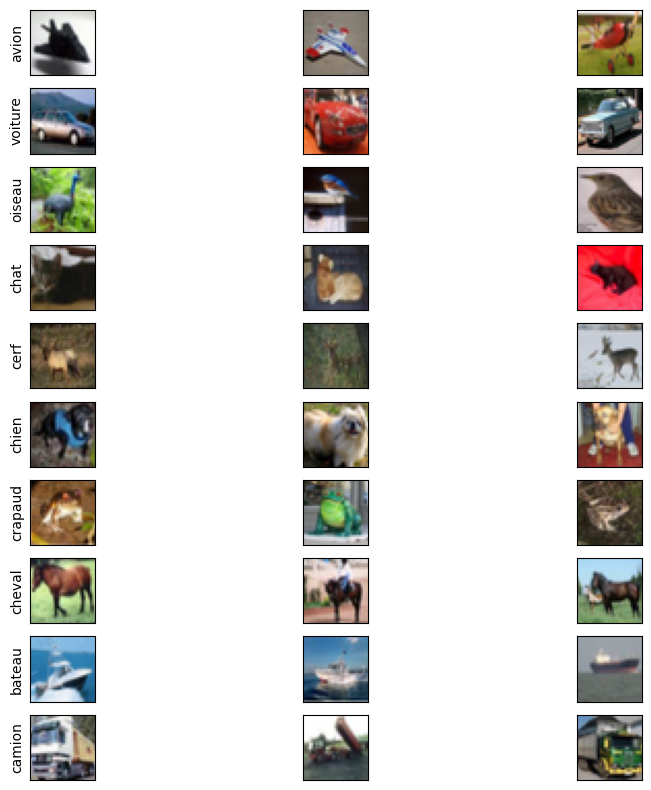

In [2]:
import matplotlib.pyplot as plt
import numpy as np
classes = ['avion', 'voiture', 'oiseau', 'chat', 'cerf', 
            'chien', 'crapaud', 'cheval', 'bateau', 'camion']

# Normalisation des valeurs des pixels entre 0 and 1
data_train, data_test = data_train / 255.0, data_test / 255.0

n_images = 3

plt.figure(figsize=(10,10))
for i in range(len(classes)):
  idx = np.where(target_train == i)
  #print(idx)
  for j in range(n_images): 
    plt.subplot(len(classes),n_images,n_images*i+j+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(data_train[idx[0][j]])
    if j == 0:
        plt.ylabel(classes[target_train[idx[0][j]][0]])
plt.show()

## Partie I. *Feedforward Neural Networks* à plusieurs couches

Construisez et entraînez un réseau de neurones type Perceptron Multicouche (PMC) à $N_{H_l} = 3$ couches cachées et avec $m_1=32, m_2=16, m_3 = 16$ neurones respectivement pour les couches cachées 1, 2 et 3.

* I.1) Combien de paramètres sont-ils optimisés au total ? 
* I.2) Quelle est la performance en apprentissage et validation ?
* I.3) Montrez la matrice de confusion

In [3]:
model = Sequential([
    Flatten(input_shape=(32, 32, 3)),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(16, activation='relu'),
    Dense(10, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 32)                98336     
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 16)                272       
                                                                 
 dense_3 (Dense)             (None, 10)                170       
                                                                 
Total params: 99,306
Trainable params: 99,306
Non-trainable params: 0
_________________________________________________________________


In [4]:
target_train_encoded = tf.keras.utils.to_categorical(target_train, 10)
target_test_encoded = tf.keras.utils.to_categorical(target_test, 10)

data_train = data_train / 255.0
data_test = data_test / 255.0

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(data_train, target_train_encoded, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
   1/1250 [..............................] - ETA: 3:10 - loss: 2.3027 - accuracy: 0.0625

2023-05-12 16:58:29.033550: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


1250/1250 [==============================] - 1s 713us/step - loss: 2.1252 - accuracy: 0.1681 - val_loss: 2.0606 - val_accuracy: 0.2006
Epoch 2/10
1250/1250 [==============================] - 1s 600us/step - loss: 2.0446 - accuracy: 0.2044 - val_loss: 2.0438 - val_accuracy: 0.2239
Epoch 3/10
1250/1250 [==============================] - 1s 601us/step - loss: 2.0219 - accuracy: 0.2245 - val_loss: 2.0087 - val_accuracy: 0.2498
Epoch 4/10
1250/1250 [==============================] - 1s 601us/step - loss: 1.9748 - accuracy: 0.2570 - val_loss: 1.9545 - val_accuracy: 0.2831
Epoch 5/10
1250/1250 [==============================] - 1s 605us/step - loss: 1.9177 - accuracy: 0.2883 - val_loss: 1.9177 - val_accuracy: 0.2897
Epoch 6/10
1250/1250 [==============================] - 1s 600us/step - loss: 1.8879 - accuracy: 0.3033 - val_loss: 1.8906 - val_accuracy: 0.3080
Epoch 7/10
1250/1250 [==============================] - 1s 604us/step - loss: 1.8654 - accuracy: 0.3147 - val_loss: 1.8695 - val_accura

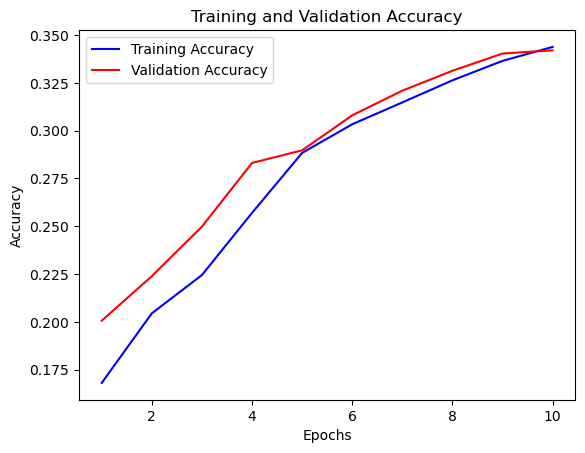

In [5]:
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

epochs = range(1, len(train_accuracy) + 1)
plt.plot(epochs, train_accuracy, 'b', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

313/313 [==============================] - 0s 289us/step


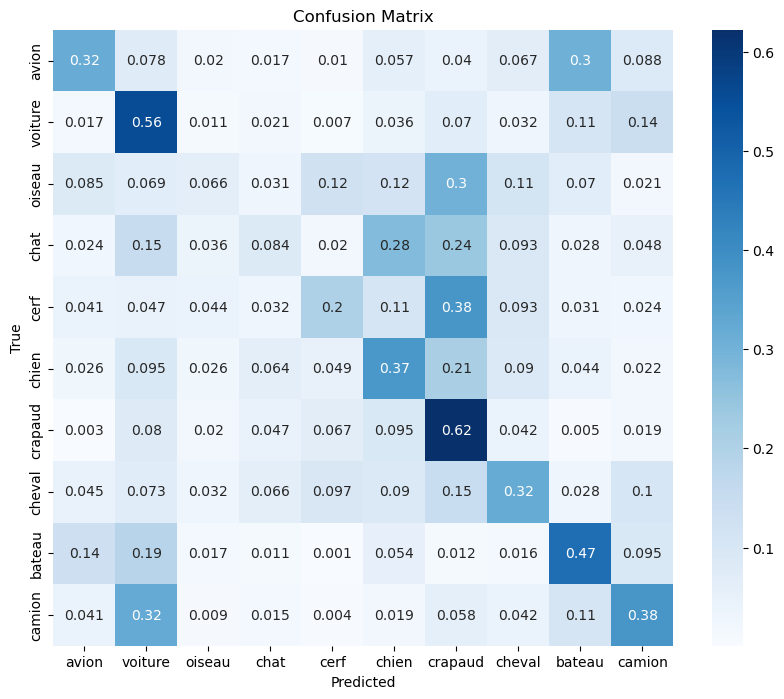

In [6]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = model.predict(data_test)
y_pred_labels = np.argmax(y_pred, axis=1)
confusion = confusion_matrix(target_test, y_pred_labels, normalize='true')
plt.figure(figsize=(10, 8))
sns.heatmap(confusion, annot=True, xticklabels=classes, yticklabels=classes, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

## Partie II. Réseaux de neurones convolutionnels (*CNN*)


Créez un CNN à l'image de *LeNet-5* (LeCun et al., 1998), qui consiste en une double alternance entre une couche convolutionnelle ($m=32$, kernel de $5x5$) et une couche de *Maximum Pooling* (kernel de $2x2$), suivie d'une couche dense ($m=64$).

In [7]:
model = Sequential([
    Conv2D(32, (5, 5), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(32, (5, 5), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])


* II.1) Combien de paramètres arrivent-ils en entrée de la couche dense ?
* II.2) Combien de paramètres sont-ils entraînés au total ?
* II.3) Quelle est la performance d'apprentissage et de validation ?

In [8]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 32)        25632     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 800)               0         
                                                                 
 dense_4 (Dense)             (None, 64)               

In [9]:
target_train_encoded = tf.keras.utils.to_categorical(target_train, 10)
target_test_encoded = tf.keras.utils.to_categorical(target_test, 10)

data_train = data_train / 255.0
data_test = data_test / 255.0

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(data_train, target_train_encoded, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
1250/1250 [==============================] - 10s 8ms/step - loss: 2.3028 - accuracy: 0.0991 - val_loss: 2.3028 - val_accuracy: 0.0952
Epoch 2/10
1250/1250 [==============================] - 9s 8ms/step - loss: 2.3028 - accuracy: 0.1002 - val_loss: 2.3027 - val_accuracy: 0.0977
Epoch 3/10
1250/1250 [==============================] - 9s 8ms/step - loss: 2.3028 - accuracy: 0.0975 - val_loss: 2.3028 - val_accuracy: 0.1014
Epoch 4/10
1250/1250 [==============================] - 10s 8ms/step - loss: 2.3028 - accuracy: 0.0982 - val_loss: 2.3027 - val_accuracy: 0.0977
Epoch 5/10
1250/1250 [==============================] - 10s 8ms/step - loss: 2.3027 - accuracy: 0.1014 - val_loss: 2.3027 - val_accuracy: 0.0952
Epoch 6/10
1250/1250 [==============================] - 10s 8ms/step - loss: 2.3028 - accuracy: 0.1007 - val_loss: 2.3027 - val_accuracy: 0.1003
Epoch 7/10
1250/1250 [==============================] - 10s 8ms/step - loss: 2.3028 - accuracy: 0.0988 - val_loss: 2.3026 - val_accu

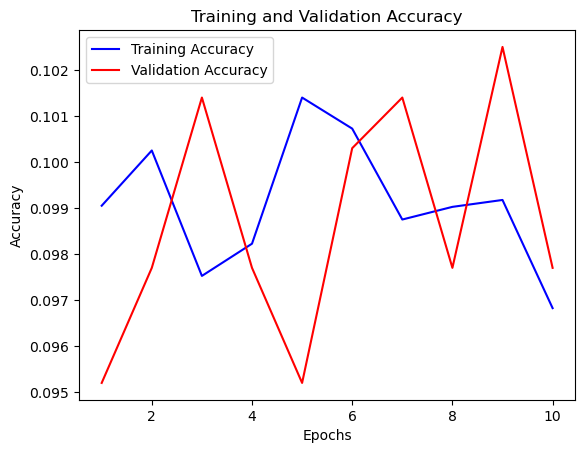

In [10]:
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

epochs = range(1, len(train_accuracy) + 1)
plt.plot(epochs, train_accuracy, 'b', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Partie III. Transfer learning

Avec l'immense progression récente du Deep Learning, il est souvent plus intéressant de créer un modèle à partir d'un autre modèle déjà entraîné et l'ajuster (*fine-tune*) selon la tâche spécifique que l'on veut réaliser. Actuellement un large catalogue de modèles très complexes entraînés sur des bases de données de très grande taille est à disposition du public général.   

Commençons par créer un réseau type *ResNet-18* (He et al., 2015) pré-entraîné sur la base de données *ImageNet*

In [11]:
#import torch 
from tensorflow.keras.applications import ResNet50

#resnet = torch.hub.load('pytorch/vision:v0.10.0', 'resnet18', pretrained=True) 

ResNet50_model = ResNet50(
    include_top=False, 
    weights='imagenet', 
    input_shape= (32, 32, 3),
    pooling='avg')

tl_cnn = Sequential()
tl_cnn.add(ResNet50_model)
tl_cnn.add(Flatten())
tl_cnn.add(Dense(10, activation='softmax'))
tl_cnn.summary()

94765736/94765736 [==============================] - 30s 0us/step
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten_2 (Flatten)         (None, 2048)              0         
                                                                 
 dense_6 (Dense)             (None, 10)                20490     
                                                                 
Total params: 23,608,202
Trainable params: 23,555,082
Non-trainable params: 53,120
_________________________________________________________________


Maintenant on ajuste le modèle pré-entraîné à notre problème spécifique (*fine-tuning*)

In [14]:
tl_cnn.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])
history4 = tl_cnn.fit(data_train, target_train, epochs=2, validation_data=(data_test, target_test))

Epoch 1/2
1563/1563 [==============================] - 457s 291ms/step - loss: 1.9788 - accuracy: 0.4039 - val_loss: 58356.7930 - val_accuracy: 0.1000
Epoch 2/2
1563/1563 [==============================] - 456s 292ms/step - loss: 1.9419 - accuracy: 0.3833 - val_loss: 677.1289 - val_accuracy: 0.1000


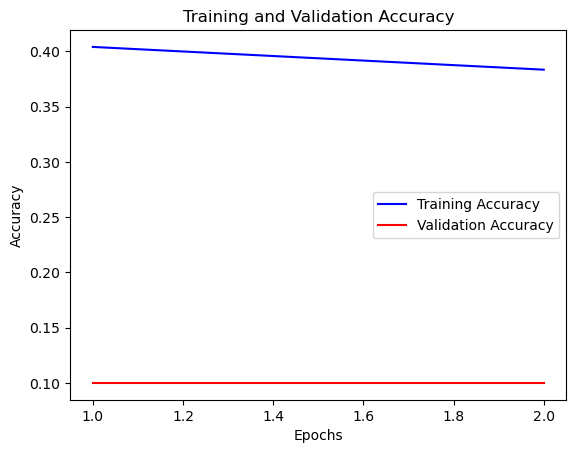

In [15]:
train_accuracy = history4.history['accuracy']
val_accuracy = history4.history['val_accuracy']

epochs = range(1, len(train_accuracy) + 1)
plt.plot(epochs, train_accuracy, 'b', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Remplissez le tableau ci-dessous selon les différentes méthodes de classification testées.

| Classifieur        | Perf Apprentissage | Perf Test | 
|--------------------|--------------------|-----------| 
| *FNN* profond      |  0.325             |  0.325| 
| *CNN*              |  0.01 | 0.01 | 
| *ResNet50*         |  0.4 |  0.1| 

* III.1) Quel est le meilleur classifieur ? Justifiez

Le meilleur classifieur est le *ResNet50* il obtient le meilleur score. Malheureusement il est couteux en temps et en ressource.

III.2) Question bonus : pendant quelques années les modèles ResNet ont été le *silver standard* dans la classification d'images. Plus récemment, une autre famille de modèles appelée *ConvNet* (Liu et al., 2022) a montré des meilleures performances. Refaite l'expérience précédente en partant d'un modèle *ConvNet* pré-entraîné.   

In [17]:
from tensorflow.keras.applications import MobileNetV2

convnet_model = MobileNetV2(
    include_top=False, 
    weights='imagenet', 
    input_shape=(32, 32, 3),
    pooling='avg'
)

convnet = Sequential()
convnet.add(convnet_model)
convnet.add(Flatten())
convnet.add(Dense(10, activation='softmax'))

convnet.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

history_convnet = convnet.fit(data_train, target_train, epochs=2, validation_data=(data_test, target_test))

convnet_train_acc = history_convnet.history['accuracy'][-1]
convnet_test_acc = history_convnet.history['val_accuracy'][-1]

print(f"Performance : \n Training: {convnet_train_acc:.4f}, Test: {convnet_test_acc:.4f}")

Epoch 1/2


/Users/pierre/anaconda3/lib/python3.10/site-packages/keras/backend.py:5582: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1563/1563 [==============================] - 65s 40ms/step - loss: 2.3321 - accuracy: 0.1607 - val_loss: 3.2226 - val_accuracy: 0.1000
Epoch 2/2
1563/1563 [==============================] - 63s 40ms/step - loss: 2.3179 - accuracy: 0.1483 - val_loss: 4.0986 - val_accuracy: 0.1000
Performance : 
 Training: 0.1483, Test: 0.1000
